#Assignment 1 (Random Forest)

* In this project you are given a dataset of housing housing price prediction. 
Dataset description is found in the given datasets.

* The goal of the project is to predict the price of a house given its attributes. 
Therefore, the problem is a regression task. 

* You need to build a random forest that consists of multiple decision trees (for regression) from the given training data set. Then, apply it on the test set and submit your code to generate predictions.
You need to build the random forest and decision trees from scratch. (I.e., it is not allowed to use existing machine learning libraries or packages such as sklearn.)

* You may use any programming language/environment of your choice, but you are required to submit the complete source code to produce the output
If you use anything other than jupyter notebook, submit an executable and run that from the main function of the jupyter notebook so that the prediction generation is automated. We can provide assistance with this.
The output (a single file with the predictions for each test instance) must be generated automatically using the approach implemented by you. Submitting predictions/code from any other source (Internet, another student, etc.) is considered cheating and will result in immediate disqualification (i.e., dismissal from the course).

##Part 1: Preprocessing and dataset analysis (20 points)

* The given dataset is quite complex, it has many attributes, and not all of them are useful! 
Training on such dataset results in a bad accuracy. And this is exactly the point! 

* "Understanding the question is half the answer". In data mining, understanding the dataset is half the answer! 

* In part 1 you need to analyze the dataset and make it clean. 
 

###Load the dataset and explore (5 points)

* Load the dataset, view the dataset and the shape of it, 

In [1]:
import pandas as pd
import math
import numbers
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
# def parse_data_description():
#     f = open("./housing_data_description.csv","r")


#     line = " "
#     datatypes = {}
#     datatypes_description = {}
#     # i = 0
#     current_key = ""
#     while line!="":
#         line = f.readline()
#         if not line.startswith("       "):
#             content = line.strip()

#             #emtpy line
#             if content=="":
#                 continue

#             keyinfo = content.split(":")
#             key, description = keyinfo[0].strip(),keyinfo[1].strip()

#             current_key = key
#             datatypes[key] = {
#                 "type_description" : description
#             }
#             continue

#         value_info = line.lstrip().rstrip()
#         if value_info=="":
#             continue

#         value_info = value_info.split("	")

#         datatypes[current_key][value_info[0].strip()] = value_info[1].strip()

#     pprint.pprint(datatypes)
#     pprint.pprint(datatypes_description)


db = pd.read_csv('./housing_price_train.csv')



### Clean the dataset (10 points)

* We cannot train on a 'dirty' dataset! There are duplicated, Null, and missing values that you need to take care of!

* Drop all columns which have null values >= 70 % and drop all rows which have null values >= 70 %.

* You need to take care of categorial data!

In [14]:
value_types  = [
    "LotFrontage",
    "LotArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "Bedroom",
    "Kitchen",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "OverallQual",
    "OverallCond"
]

def PreprocessingData(db: pd.DataFrame):
    """
        TODO
        Show NULL values for each columns in dataset and thier percentage
        Drop all columns which have null values >= 70 %
        Drop all rows which have null values >= 70 %
        Fill all missing values with the (mean, mode)
    """

    for index, row in db.iterrows():
        row_null_percentage = row.isnull().sum()/db.shape[0]
        if row_null_percentage > 0.7:
            db.drop(index=index, inplace=True)

    for column_name in db.columns:
        column_null_percentage = db[column_name].isnull().sum()/db.shape[1]
        if column_null_percentage > 0.7:
            db.drop(columns=column_name,inplace=True)



    # Fill any columns of value types with the mean
    for column_name in value_types:
        try: # Key might have been removed due to the step above
            if db[column_name].isnull().any():
                db[column_name].fillna(db[column_name].mean(), inplace=True)
        except KeyError:
            pass

    # Fill any categorical data with the mode() value, meaning the value which
    # appears the the most
    db.fillna(db.mode().iloc[0], inplace=True)

PreprocessingData(db)

print(db)


        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

### Correlations! (5 points)

* Now we have a clean dataset, but not all attributes are useful! 

* Display the corrlation between all features and the sales price. This will show you which feature affects sales price more. You may use *corr()* function. 

* Choose the most correlated features, and remove others. 

In [4]:
sale_price_correlation = db.corrwith(db['SalePrice']).sort_values(ascending=False)
print(sale_price_correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64


/tmp/ipykernel_9725/1020346835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sale_price_correlation = db.corrwith(db['SalePrice']).sort_values(ascending=False)


In [5]:
sale_price_correlation_filtered = sale_price_correlation[abs(sale_price_correlation) > 0.20].index
db_filtered = db[sale_price_correlation_filtered]

print(sale_price_correlation_filtered)
print(db_filtered)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath',
       'BsmtUnfSF'],
      dtype='object')
      SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     21000

## Part 2: Decision Tree (45 points)
#### Building a Decision Tree:
A Decision tree consists of nodes connected by edges. A decision tree is typically, a binary tree, which has the following properties:
- One node is marked as Root node
- Every node other than the root has a parent node
- Each node can have at most 2 child nodes (left edge & right edge)
- Leaf node is the node which contains pure data or when we reach to the maximum depth 

To create the decision tree model for scratch you need to create two classes (a class for the node, for example "class DecisionNode():" and a class for Decision Tree model, for example "class RegressionDecisionTree():")


1- DecisionNode class used to save some values for each node we do the spliting on it until we reach the leaf node
so we will save the following values for the node:
- feature: feature index.
- threshold: the value we used to split the data on.
- value: the average value for the leaf node.
- True_Branch: if the condition is true.
- False_Branch: if the condition is false.

In [6]:
class DecisionNode():
    def __init__(self, feature_idx=None, threshold=None, value=None, true_branch=None, false_branch=None):
        self.feature_idx = feature_idx # index of the feature that is used
        self.threshold = threshold     # threshold value for feature when making the decision
        self.value = value # Average value if the node is a leaf in the tree
        self.true_branch = true_branch # the node we go to if decision returns True
        self.false_branch = false_branch # the node we go to if decision returns False

# Decision Tree Class
This Class consists the following functions:
<ol>
<li> <b>build_tree</b>: used to create the decision tree nodes</li> 
<li> <b>calc_variance_reduction</b> : measure the impurity by using variance reduction measure (like MSE) </li> 
the function takes three parameters (parentRec: the records for the target before split,and the left and right records after splitting. This function used to measure the impurity for each node and decide if we will split or not.
<li> <b>majority_vote</b>: used to calculate values for the leaf nodes records which equal to the mean of these records.</li> 
<li><b>split_by_feature</b>: this function take the feature and the threshold and check if the feature is numerical so it split the records into two node (true which is the left edge and false which is the right edge)
if the feature is categorical so it split where the values equal to the threshold</li>
<li> <b>fit</b>: Used to train the dataset after spliting the data into two part x: features, y: target</li>
<li><b>predict_value</b>: used to predict the value for each record, it is a recursive method to find the leaf node that corresponds to prediction
<li><b>predict</b>: take all records for the test data and iterate into each record to predit the y(target) value and save the result into a prediction list. 

In [7]:


class RegressionDecisionTree():
    # constructor
    def __init__(self, min_VarianceReduction=1e-7, max_depth=5):
        self.root = None # root of this tree
        self.min_VarianceReduction = min_VarianceReduction # minimum VarianceReduction to allow splitting
        # used to stopping conductions
        self.max_depth = max_depth # maximum depth the tree grows to


    # used to create the decision tree nodes
    # X is the feature matrix containing training data
    # y is the stuff we want to predict, aka sales price
    def build_tree(self, X:pd.DataFrame, y: pd.DataFrame, current_depth=0):
        # we will use decision dictionary to save the feature and the threshold we build the tree on
        decision = None
        # we will use subtrees dictionary to save the feature and the threshold we build the tree on
        subtrees = None
        largest_variance_Reduction = 0
        # add y as last column of X
        df = pd.concat((X, y), axis=1)

        n_rows, n_features = X.shape
        if current_depth <= self.max_depth:
            # iterate through every feature
            for feature_idx in range(n_features):
                # values of that column
                feature_values = X.iloc[:, feature_idx]
                unique_values = feature_values.unique()
                # print(unique_values)
                for threshold in unique_values:
                    X_trueEdge, X_falseEdge = self.split_by_feature(df, feature_idx, threshold)
                    # print(X_trueEdge)
                    # print(X_falseEdge)
                    if len(X_trueEdge) > 0 and len(X_falseEdge) > 0:
                        y_true = X_trueEdge.iloc[:,-1]
                        y_false = X_falseEdge.iloc[:,-1]
                        # Calculate impurity
                        VarianceRed = self.Calc_variance_reduction(y, y_true, y_false)
                        # Keep track of which feature gave the largest information gain
                        if VarianceRed > largest_variance_Reduction:
                            largest_variance_Reduction = VarianceRed
                            decision = {
                                "feature_idx":feature_idx,
                                "threshold":threshold
                                }
                            subtrees = {
                                "X_true":X_trueEdge.iloc[:,:-1],
                                "y_true":y_true,
                                "X_false":X_falseEdge.iloc[:,:-1],
                                "y_false":y_false
                                }

        # we will construct new branch of tree if the variance_Reduction is larger than minimum variance_Reduction that we've defined
        if largest_variance_Reduction > self.min_VarianceReduction:
            true_branch = self.build_tree(subtrees["X_true"], subtrees["y_true"], current_depth+1)
            false_branch = self.build_tree(subtrees["X_false"], subtrees["y_false"], current_depth+1)
            return DecisionNode(feature_idx=decision["feature_idx"], threshold=decision["threshold"], true_branch=true_branch, false_branch=false_branch)

        # at leaf node we calculate the mean for the records
        # print("i reached majority vote")
        leaf_value = self.majority_vote(y)
        return DecisionNode(value=leaf_value)

    # measure the impurity by using variance reduction measure (like MSE)
    # left_edgeRec= True edge: where condition is true
    # Right_edgeRec= False edge: where condition is false
    def Calc_variance_reduction(self, parentRec, left_edgeRec, right_edgeRec):
        n_left = len(left_edgeRec)
        n_right = len(right_edgeRec)

        # Calculate the weighted variance for left and right edges
        left_weight = n_left / len(parentRec)
        right_weight = n_right / len(parentRec)

        left_variance = left_edgeRec.var() if n_left > 0 else 0  # Check to avoid var calculation on empty
        right_variance = right_edgeRec.var() if n_right > 0 else 0
        left = left_weight * left_variance
        right = right_weight * right_variance

        return parentRec.var() - (left + right)



    def majority_vote(self, Y):
        return Y.mean()


    def split_by_feature(self, db, feature_idx, threshold):
        # This function takes a feature and a threshold
        # then splits the records into two nodes based on whether the feature is numerical or categorical.
        # 1. For numerical features, it divides the data into a "true" node (left edge) for values less than or equal to the threshold,
        # and a "false" node (right edge) for values greater than the threshold.
        #
        # 2. For categorical features, it splits the data into two nodes where one contains records with values equal to
        # the threshold (true node), and the other contains all other values (false node).

        # split the data into left_edge & right_edge depends one specified feature and the threshold

        # if db.columns[feature_idx] in value_types:
        if isinstance(threshold, numbers.Number):
            left_true = db[db.iloc[:, feature_idx] >= threshold]
            right_false = db[db.iloc[:, feature_idx] < threshold]

            return left_true, right_false

        left_true = db[db.iloc[:, feature_idx] == threshold]
        right_false = db[db.iloc[:, feature_idx] != threshold]

        return left_true, right_false


    # Used to train the dataset after spliting the data into x: features, y: target
    def fit(self, X, y):
        self.root = self.build_tree(X, y)


    def predict_value(self, xTest, tree=None):
        if tree is None:
            tree = self.root

        if tree.value is not None:
            return tree.value

        feature_value = xTest[tree.feature_idx]
        # print(f"xtest is: {xTest}")

        # if db.columns[feature_idx] in value_types:
        if not isinstance(feature_value, numbers.Number):
            if feature_value == tree.threshold:
                return self.predict_value(xTest, tree.true_branch)
            return self.predict_value(xTest, tree.false_branch)

        if feature_value >= tree.threshold:
            return self.predict_value(xTest, tree.true_branch)
        return self.predict_value(xTest, tree.false_branch)

    # to predict the value we need to pass the all records for features and we save the prediction for each records into a list
    def predict(self, XTest):
        y_pred = []
        for idx, row in XTest.iterrows():
            y_pred.append(self.predict_value(row.values))
        return y_pred


- To Check the Accuracy for our prediction we use CalcAccuracy function which take the actual values for the test dataset and the predicted values and apply the RMSE formula.

In [8]:

def CalcAccuracy(Actual_Y, Predicted_y):
    return math.sqrt(((Actual_Y - Predicted_y)**2).sum() / len(Actual_Y))





- Build decision tree model
- Fit the model
- Predict the values from test data 

In [9]:
reg_tree = RegressionDecisionTree()
x = db_filtered.drop(columns="SalePrice")
y = db_filtered["SalePrice"]

reg_tree.fit(x,y)





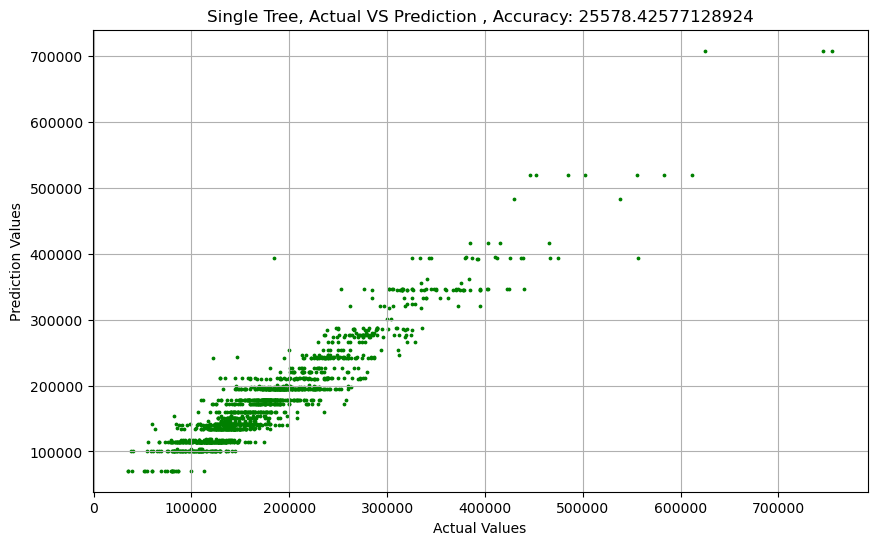

In [10]:
def graph(x,title):

    result_df = pd.DataFrame({
        'Prediction': x,
        'Actual': y
        })

    acc = CalcAccuracy(result_df["Actual"],result_df["Prediction"])

    plt.figure(figsize=(10, 6))
    plt.scatter(result_df['Actual'], result_df['Prediction'], color='green', s=3)

    plt.title(f'{title} , Accuracy: {acc}')
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.grid(True)
    plt.show()


graph(reg_tree.predict(x),"Single Tree, Actual VS Prediction")



## Part 3: Random Forest (20 points)
#### Random forest class
- the Class consist of the following functions:
<ul>
    <li>Constructor: consists of the subset data (Training & Testing) dataset after preprocessing and a list of deciceion tree objects </li>    
    <li>Subsampling: Bagging we will take random sample with replacement for the Training dataset </li>
    <li>build_model: first make subsample for the training dataset, then split the data into featurespart(X) and targetpart(Y), then take 10 samples of the feature part, finally build the decision tree (fit), this function take the number of DT that we want to build</li>
    <li>predict: take the test dataset and make the prediction for the target field in all the tree in the random forest then take the mean for the prediction in each tree, finally add the mean of prediction to a list of predition </li>

</ul>

In [11]:
class RF(object):
    def __init__(self):
        self.Traindata = None  # training data set (loaded into memory)
        self.Testdata = None  # Test data set for prediction
        self.trees = []  # list of decision trees


     # This function generate a subsample with replacement
    def __subsampling(self, train_set, sample_size_ratio):
        sample_number = round(len(train_set) * sample_size_ratio)
        return  train_set.sample(n = sample_number, replace=True)



    def build_model(self, train_set, sample_size_ratio, number_of_trees):
        for i in range(number_of_trees):
            TrainingSample = self.__subsampling(train_set, sample_size_ratio)

            # Same as above
            reg_tree = RegressionDecisionTree()
            x = TrainingSample.drop(columns="SalePrice")
            y = TrainingSample["SalePrice"]

            reg_tree.fit(x,y)
            self.trees.append(reg_tree)


    def predict(self, test_set):
        # [
        #     t1: [1,2,3,4,5,6],
        #     t2: [1,2,3,4,5,6],
        #     t3: [1,2,3,4,5,6],
        #     t3: [1,2,3,4,5,6],
        #     t3: [1,2,3,4,5,6],
        # ]
        return pd.DataFrame([x.predict(test_set) for x in self.trees]).mean(axis=0)


### Create Random Forest

* Create 10 Decision Tree in the randomforest
* Train the random forest with the dataset
* Use the created random forest to predict the test dataset 

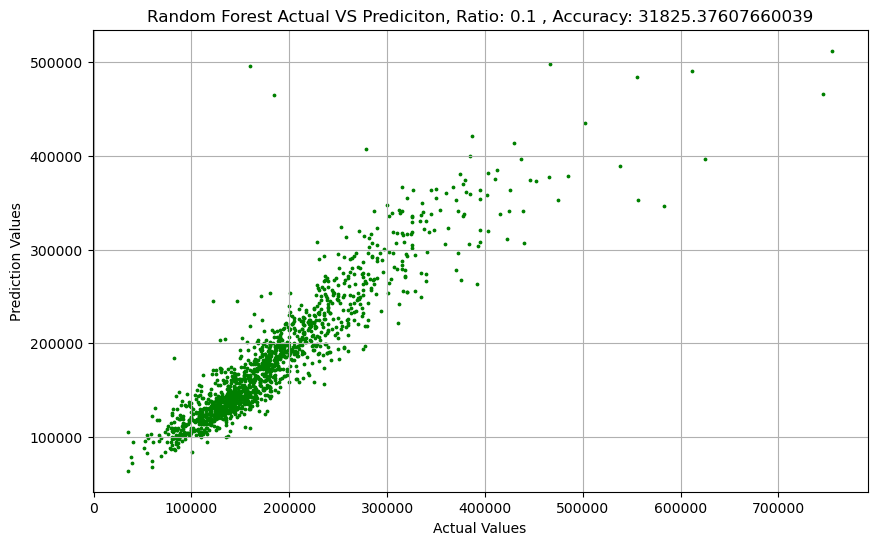

In [12]:
rf = RF()
rf.build_model(db_filtered,0.1,10)
graph(rf.predict(x),"Random Forest Actual VS Prediciton, Ratio: 0.1")

# Part4: Comparison! (15 points)


Now that you have finished implementing your Random Forest, it's time for some experiments and analysis! 

* Use the Random Forest in the scikit-learn library and train it on the same dataset. 

* Compare the accuracy given by your Random Forest to the scikit-learn one. 

* Increase the number of trees in your Random Forest. Does it improve the accuracy? 

* Make a table for comparing your Random Forest accuracy with different number of trees with the scikit-learn one. What is your conclusion? 

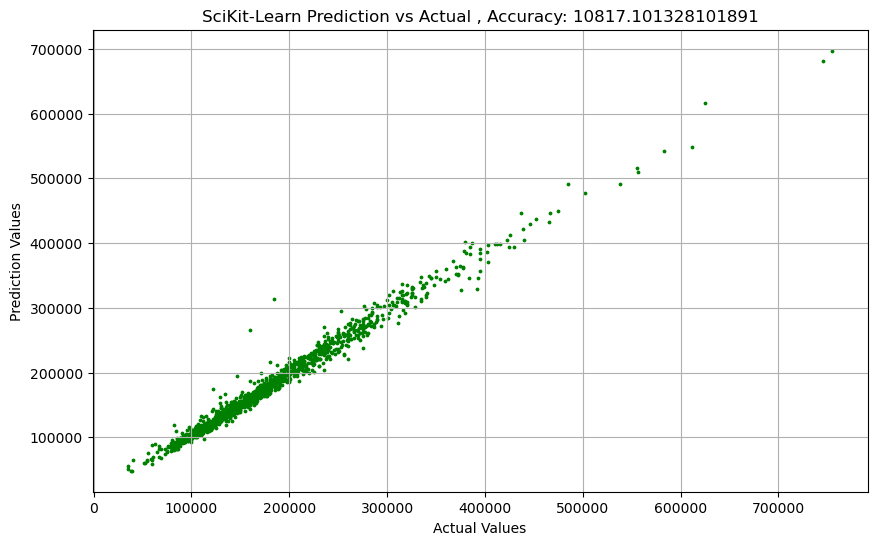

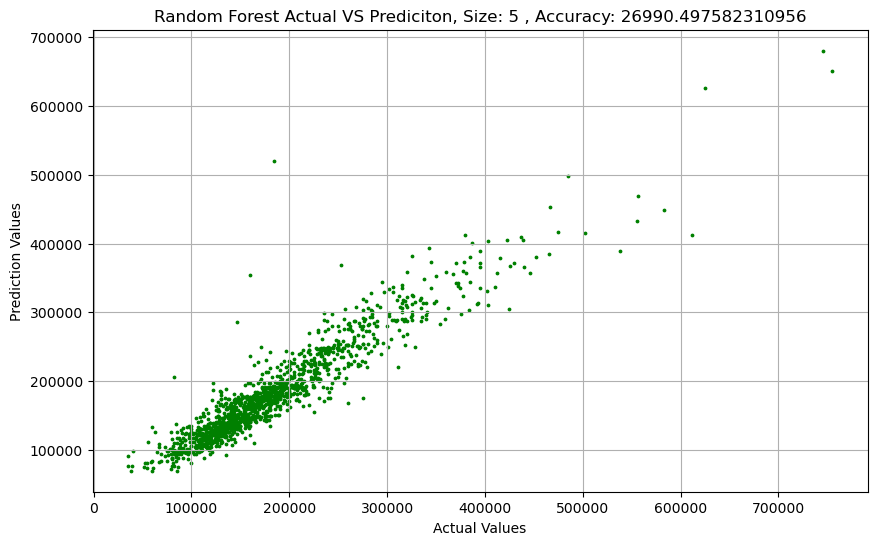

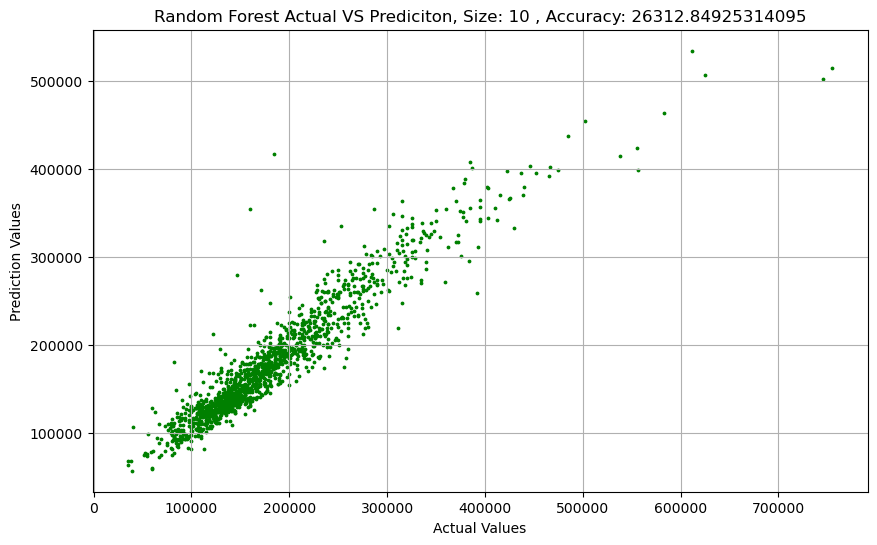

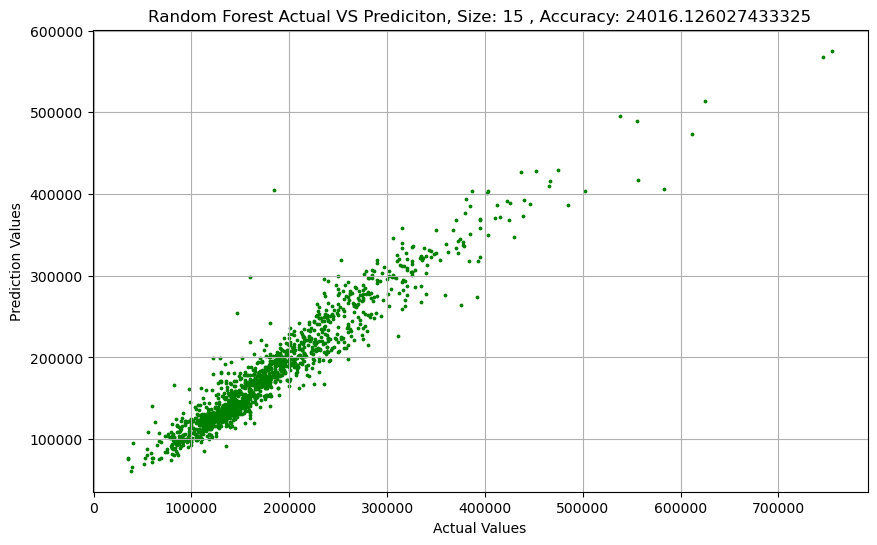

In [13]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=100)

rf_model.fit(x, y)

y_pred = rf_model.predict(x)


graph(y_pred,"SciKit-Learn Prediction vs Actual")

rf = RF()
rf.build_model(db_filtered,0.5,5)
graph(rf.predict(x),"Random Forest Actual VS Prediciton, Size: 5")

rf = RF()
rf.build_model(db_filtered,0.5,10)
graph(rf.predict(x),"Random Forest Actual VS Prediciton, Size: 10")

rf = RF()
rf.build_model(db_filtered,0.5,15)
graph(rf.predict(x),"Random Forest Actual VS Prediciton, Size: 15")




